<a href="https://colab.research.google.com/github/AsraniSanjana/PDL_winternship/blob/main/ColabFiles/classification_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: Making a Classification Model and converting it into circuit python code to be run in arduino Using **mc2gen** library

With Scaling using **OHE** (get_dummies)

# **Dataset**: https://www.kaggle.com/datasets/burak3ergun/loan-data-set

**Features**:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

LoanAmount

Loan_Amount_Term

Credit_History

Property_Area

Loan_Status

**Data has dropped Load_id**

**X has dropped Load_id and Loan_status**

**y has Loan_status**


In [ ]:
!pip install m2cgen
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import m2cgen as m2c
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("loan_data_set.csv")

In [ ]:
def preprocessing(data):

    # replace with numerical values
    data['Dependents'].replace('3+', 3,inplace=True)
    data['Loan_Status'].replace('N', 0,inplace=True)
    data['Loan_Status'].replace('Y', 1,inplace=True)

    # handle missing data
    data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
    data['Married'].fillna(data['Married'].mode()[0], inplace=True)
    data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
    data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
    data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
    data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
    data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

    # drop ID column
    data = data.drop('Loan_ID',axis=1)

    #split features and target
    X = data.drop('Loan_Status',axis=1)
    y = data.Loan_Status.values

    #scale the  features
    X  = pd.get_dummies(X,columns=["Gender","Married","Education","Self_Employed","Property_Area"])
    # X = StandardScaler().fit_transform(X)


    return X,y

In [ ]:
X,y = preprocessing(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [ ]:
X.shape

(614, 17)

In [ ]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
y.shape

(614,)

In [ ]:
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model_to_python = m2c.export_to_c(classifier)
model_to_python

'double score(double * input) {\n    return 0.8403132759363621 + input[0] * 0.03092240211853326 + input[1] * -0.013809741456546834 + input[2] * -0.17161032063154788 + input[3] * -0.05952955641079039 + input[4] * -0.06553058317207495 + input[5] * 1.368550132982471 + input[6] * 0.002335280411847812 + input[7] * -0.0023352804118478517 + input[8] * -0.1551619018380342 + input[9] * 0.15516190183803447 + input[10] * 0.10115272906576807 + input[11] * -0.10115272906576807 + input[12] * 0.024971672006824704 + input[13] * -0.024971672006824965 + input[14] * -0.14104559756923174 + input[15] * 0.21926776968664832 + input[16] * -0.09003081134554268;\n}\n'

In [ ]:
test_data = X_test[6]
print(test_data)
# 6th tuple test karhe

[-0.73780632  2.0906627  -0.55448733 -0.24693908  0.2732313   0.41173269
  2.11710719 -2.11710719  1.37208932 -1.37208932 -1.89264089  1.89264089
 -2.54711697  2.54711697 -0.64147818 -0.7820157   1.42814704]


In [ ]:
pred = classifier.predict(test_data.reshape(1,-1))
print("prediction result: {}".format(pred))

prediction result: [1]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Sample input for prediction
'''
sample_input = {
  # pred is 0
    'Dependents': 1,
    'ApplicantIncome': 5000,
     'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
     'Credit_History': 1,
    'Gender_Female': 0,
    'Gender_Male': 1,
     'Married_No': 0,
    'Married_Yes': 1,
    'Education_Graduate':	0,
    'Education_Not Graduate':	1,
    'Self_Employed_No': 0,
    'Self_Employed_Yes':	1,
    'Property_Area_Rural':	1,
    'Property_Area_Semiurban':	0,
    'Property_Area_Urban': 0


}
'''
sample_input = {
    'Dependents': 1,
    'ApplicantIncome': 12841,
     'CoapplicantIncome': 10968,
    'LoanAmount': 349,
    'Loan_Amount_Term': 360,
     'Credit_History': 1,
    'Gender_Female': 0,
    'Gender_Male': 1,
     'Married_No': 0,
    'Married_Yes': 1,
    'Education_Graduate':	1,
    'Education_Not Graduate':	0,
    'Self_Employed_No': 1,
    'Self_Employed_Yes':	0,
    'Property_Area_Rural':	0,
    'Property_Area_Semiurban':	1,
    'Property_Area_Urban': 0


}

	# Dependents	ApplicantIncome	CoapplicantIncome	LoanAmount	Loan_Amount_Term	Credit_History	Gender_Female	Gender_Male	Married_No	Married_Yes	Education_Graduate	Education_Not Graduate	Self_Employed_No	Self_Employed_Yes	Property_Area_Rural	Property_Area_Semiurban	Property_Area_Urban

# Convert the input to a DataFrame
sample_input_df = pd.DataFrame([sample_input])

# Preprocess the input
sample_input_preprocessed = sample_input_df.copy()  # Make a copy to avoid modifying the original data
sample_input_preprocessed['Dependents'].replace('3+', 3, inplace=True)
# sample_input_preprocessed = pd.get_dummies(sample_input_preprocessed, columns=["Gender", "Married", "Education", "Self_Employed", "Property_Area"])
# sample_input_preprocessed = StandardScaler().fit_transform(sample_input_preprocessed)



In [ ]:
sample_input_preprocessed

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,12841,10968,349,360,1,0,1,0,1,1,0,1,0,0,1,0


In [ ]:
pred = classifier.predict(sample_input_preprocessed)
print("prediction result: {}".format(pred))

prediction result: [0]


In [ ]:
sample_input_preprocessed = StandardScaler().fit_transform(sample_input_preprocessed)
sample_input_preprocessed

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

# CONCLUSION:

Each datapoint is subtracted by mean and normalized with standard deviation. Hence, it becomes zeros if the number of datapoints is one.
The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Hence, if you have only one data point, then the standard score is always going to be all zeros.

In [ ]:
pred = classifier.predict(sample_input_preprocessed)
print("prediction result: {}".format(pred))

prediction result: [1]


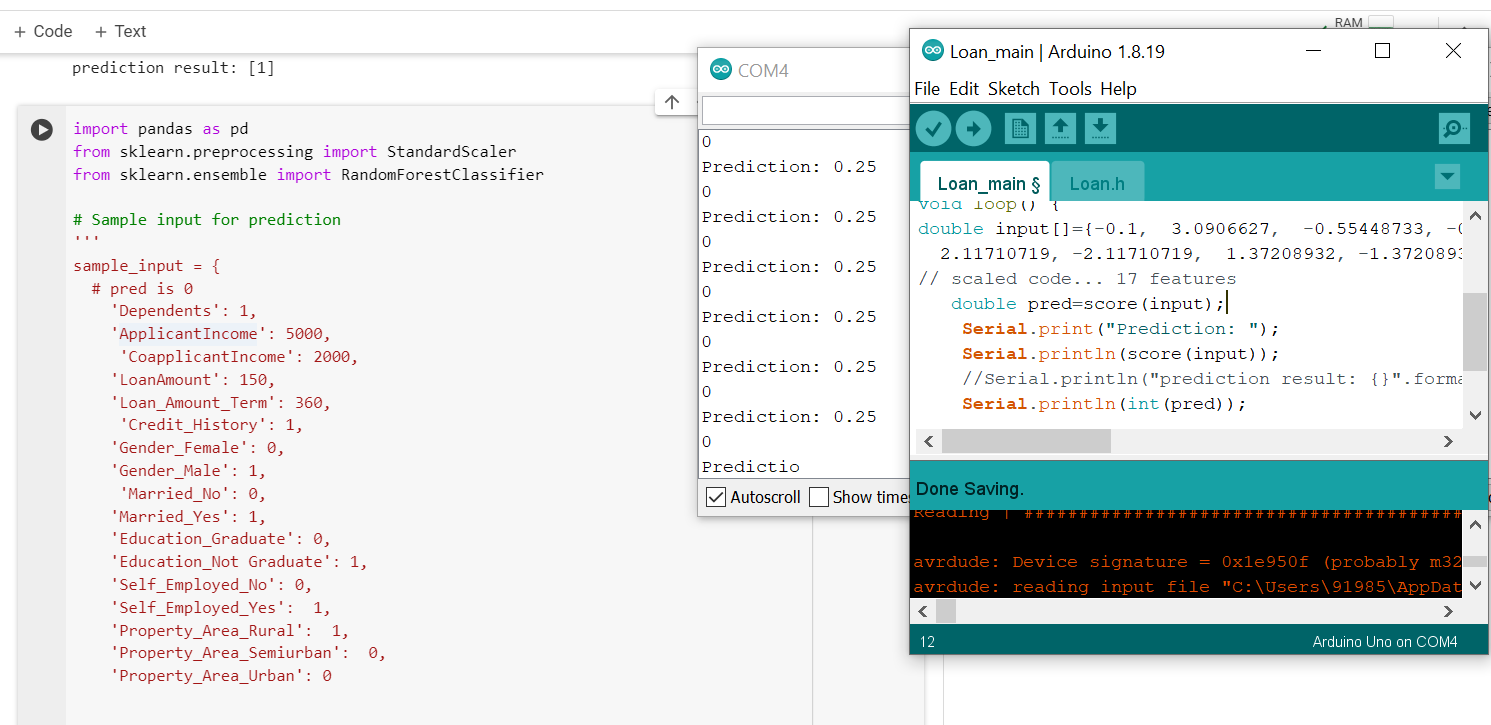

# Code for Load_main.ino:


\#include "Loan.h"

void setup() {
   Serial.begin(115200);
}

void loop() {
double input[]={-0.1,  3.0906627,  -0.55448733, -0.24693908,  1.2732313,   0.41173269,
  2.11710719, -2.11710719,  1.37208932, -1.37208932, -1.89264089,  1.89264089, -2.54711697,  2.54711697, -0.64147818, -0.7820157,   1.42814704};
// scaled code... 17 features
   double pred=score(input);
    Serial.print("Prediction: ");
    Serial.println(score(input));
    //Serial.println("prediction result: {}".format(int(pred)))
    Serial.println(int(pred));
    
}

# Code for Load.h: (the op code fom .export_to_c )

double score(double * input) {
    return 0.8403132759363621 + input[0] * 0.03092240211853326 + input[1] * -0.013809741456546834 + input[2] * -0.17161032063154788 + input[3] * -0.05952955641079039 + input[4] * -0.06553058317207495 + input[5] * 1.368550132982471 + input[6] * 0.002335280411847812 + input[7] * -0.0023352804118478517 + input[8] * -0.1551619018380342 + input[9] * 0.15516190183803447 + input[10] * 0.10115272906576807 + input[11] * -0.10115272906576807 + input[12] * 0.024971672006824704 + input[13] * -0.024971672006824965 + input[14] * -0.14104559756923174 + input[15] * 0.21926776968664832 + input[16] * -0.09003081134554268;
}
